**Siddhesh Nikam**

**NEU ID : 002378758**

**With Example 2**



## Worked Example :Wine Quality Dataset

## Introduction

The Wine Quality dataset provides information about various chemical properties of red and white wines, along with their quality ratings on a scale from 0 to 10. This dataset is widely used in data science to understand the relationship between the physicochemical properties of wines and their quality. Through Exploratory Data Analysis (EDA), we can uncover patterns, detect outliers, and understand how the different features of the wines, such as acidity, alcohol content, and sulphates, influence their quality.

The primary goal of EDA in the Wine Quality dataset is to explore the distribution of quality scores and the relationships between different wine attributes. This analysis will help us understand which factors are most strongly correlated with wine quality, thus guiding further modeling efforts.



**Research Question**

How does Exploratory Data Analysis (EDA) help in understanding and preparing data for modeling?


## Problem Statement

**Datasets Chosen**

Wine Quality Dataset: Used to analyze factors affecting wine quality.

**Research Goals**

Wine Quality Dataset: Determine which features influence wine quality the most.



## Problem Analysis

**Data Constraints**

**Missing values in the Wine Quality Insights**

## Data Constraints

**Feature Distribution**

The Wine Quality dataset has both numeric and categorical features. For example, features like alcohol, fixed acidity, citric acid, and density are continuous numeric variables, while quality is a discrete variable representing wine quality on a scale (typically 0 to 10).
Some features may have skewed distributions (e.g., residual sugar, density), which can affect how models interpret the data. Understanding these distributions will help in selecting the appropriate models and transformations.

**Feature Interdependencies**


In the Wine Quality dataset, certain features may be highly correlated (e.g., alcohol and quality), while others may not have a clear relationship. Feature engineering, such as identifying interactions or combining features, could help to address these correlations.
It's essential to consider multicollinearity in regression models or other algorithms where correlated features can affect predictions.

**Scale of Features**

Some variables in the dataset may have very different scales (e.g., fixed acidity vs. citric acid), which can impact algorithms that are sensitive to feature scaling, like k-NN or logistic regression.
Standardization or normalization of features may be required to bring them onto a similar scale.

**Imbalanced Classes**

The quality feature, representing wine quality ratings, might be imbalanced—there could be more wines rated 5 or 6 than other scores. This imbalance can affect model training and result in bias. Class balancing techniques such as SMOTE (Synthetic Minority Over-sampling Technique) or undersampling might be necessary to improve model performance.

**Outliers**

Some features like sulphates or alcohol might contain outliers, which can skew results or affect model performance. Visualizing the features through box plots can help detect these outliers.
Handling outliers could involve capping, removal, or transformation based on domain knowledge and the impact on the dataset.

**Temporal or Contextual Changes**

Depending on when the dataset was collected, external factors such as seasonal variations in grape production or changes in wine production methods may influence the features. Being aware of such changes can help inform feature interpretation.


## Missing Values in the Wine Quality Dataset

Missing values in any dataset are problematic, as they can lead to bias, inaccurate insights, or errors in model predictions. Handling missing data correctly is crucial, especially when the missingness is not random.

**Identifying Missing Data**

The Wine Quality dataset might contain missing values in certain columns. You can check for missing data by inspecting the dataset and summarizing it.
Methods:
Null Count: You can use methods like df.isnull().sum() to check for missing values across all features.
Heatmap: A heatmap visualization (seaborn.heatmap) helps you visually spot missing data.

**Types of Missing Data**

Missing Completely at Random (MCAR): If the data is missing entirely by chance (e.g., missing values in citric acid due to sensor malfunction), then imputing or removing these values should have little impact on the analysis.
Missing at Random (MAR): If data is missing based on other observed variables (e.g., sulphates is more likely to be missing for wines with lower quality), then you might need to account for this missingness by considering those relationships during imputation.
Not Missing at Random (NMAR): If the data is missing due to reasons that are intrinsic to the variable (e.g., alcohol might be missing more often in wines with a certain quality), it’s essential to investigate how the missingness relates to the quality ratings.

**Handling Missing Values**

Imputation:

Mean/Median Imputation: For numeric variables, imputing missing values with the mean (for symmetric distributions) or median (for skewed distributions) is a common approach.
Mode Imputation: For categorical features (if present in the dataset), the mode (most frequent value) can be used to fill missing entries.

**KNN Imputation**
The k-NN algorithm can be used to impute missing values based on the values of the nearest neighbors. This is useful when missingness is likely to be dependent on other features.
Predictive Imputation: Regression models or decision trees can be used to predict missing values based on other features.
Deletion:

Listwise Deletion: If the percentage of missing values is low (for example, less than 5%), you could consider removing rows with missing data.
Pairwise Deletion: If the missing values are concentrated in certain columns, you could remove specific columns or only consider pairs of variables with no missing data.

**Transformation**

If missing values in a column are significant and cannot be easily imputed, transforming the missing values into a new category or a placeholder value (like “Unknown”) could be useful, especially if that missingness itself carries information.
Checking for Patterns in Missing Data:

Missing Data Visualization: You can use a missingness heatmap to visualize missing data and look for patterns. This can help you decide how to handle missing values more effectively.
Imputation vs. Deletion: Analyze the impact of imputation or deletion on the dataset’s distributions. For instance, if imputing fixed acidity drastically changes the distribution of the feature, deletion may be a better option.


## Impact of Missing Data on Wine Quality Insights

**Wine Quality Modeling**

Missing data in critical features (such as alcohol, volatile acidity, or pH) could have a significant impact on predictive modeling. Imputation helps restore the dataset to full completeness, but you need to ensure that the imputation technique used doesn't introduce bias.

**Domain Knowledge Considerations**

Domain knowledge about wine quality can help inform how to handle missing values. For example, wine chemical composition features might be interrelated, so imputing one feature with the mean value could ignore these relationships. Advanced imputation strategies like using multi-variable imputation could be beneficial.

**Impact on Summary Statistics**

Missing data, especially in skewed distributions, can affect summary statistics like the mean or variance. It’s essential to handle missingness properly to ensure these statistics are reflective of the true data.



In [56]:
import pandas as pd

# Sample data
data = {
    'Fixed Acidity': [7.4, 7.8],
    'Volatile Acidity': [0.70, 0.88],
    'Citric Acid': [0.00, 0.00],
    'Residual Sugar': [1.9, 2.6],
    'Quality': [5, 5]
}

# Create DataFrame
df_wine_sample = pd.DataFrame(data)

# Display the DataFrame
df_wine_sample


,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Quality
0,7.4,0.70,0.0,1.9,5
1,7.8,0.88,0.0,2.6,5


In [9]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [22]:
import os

# Define the path to the ZIP file
zip_path = "archive.zip"  # Make sure this path points to your downloaded ZIP file

# Get the current directory
current_dir = os.getcwd()

# Extract the contents of the ZIP file to the current directory
with zipfile.ZipFile(zip_path, 'r') as zip_ref:  # Use 'r' mode to open the file for reading
    zip_ref.extractall(current_dir)

print("Extraction complete.")



Extraction complete.


In [52]:
import pandas as pd
import os

# Load the dataset (assuming the dataset is 'winequality-red.csv' after extraction)
df_wine = pd.read_csv(os.path.join(current_dir, 'winequality-red.csv'), sep=";")

# Display dataset info
print("\nDataset Overview:\n")
print(df_wine.info())
print("\nSummary Statistics:\n", df_wine.describe())



Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 1 columns):
 #   Column                                                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                                                             --------------  ----- 
 0   fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality  1599 non-null   object
dtypes: object(1)
memory usage: 12.6+ KB
None

Summary Statistics:
        fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count                                                1599                                                                       

In [54]:
# Check the shape of the numeric dataframe
df_wine_numeric = df_wine.select_dtypes(include=['float64', 'int64'])

# Print the shape of the numeric dataframe
print("\nShape of numeric columns dataframe:", df_wine_numeric.shape)




Shape of numeric columns dataframe: (1599, 0)


In [26]:
# Load the dataset (assuming the dataset is 'winequality-red.csv' after extraction)
df_wine = pd.read_csv(os.path.join(current_dir, 'winequality-red.csv'), sep=";")

# Display dataset info
print("\nDataset Overview:\n")
print(df_wine.info())
print("\nSummary Statistics:\n", df_wine.describe())



Dataset Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 1 columns):
 #   Column                                                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                                                             --------------  ----- 
 0   fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality  1599 non-null   object
dtypes: object(1)
memory usage: 12.6+ KB
None

Summary Statistics:
        fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count                                                1599                                                                       

In [32]:
# Print column types again
print("\nColumns and their datatypes:")
print(df_wine.dtypes)

# If needed, force conversion of object columns to numeric (ignoring errors for non-numeric values)
df_wine = df_wine.apply(pd.to_numeric, errors='coerce')

# Now, try selecting numeric columns again
df_wine_numeric = df_wine.select_dtypes(include=[np.number])

# Check if there are any numeric columns now
print("\nShape of numeric columns dataframe after conversion:", df_wine_numeric.shape)




Columns and their datatypes:
fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality    object
dtype: object

Shape of numeric columns dataframe after conversion: (1599, 1)


In [34]:
# Drop rows with any missing values
df_wine_numeric_clean = df_wine_numeric.dropna()

# Now check the shape again
print("\nShape of cleaned numeric dataframe:", df_wine_numeric_clean.shape)

# Proceed to plot if there is data available
if df_wine_numeric_clean.shape[0] > 0:
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_wine_numeric_clean.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title("Wine Quality Correlation Heatmap")
    plt.show()
else:
    print("No valid numeric data available for correlation matrix.")






Shape of cleaned numeric dataframe: (0, 1)
No valid numeric data available for correlation matrix.


In [38]:
df_wine = pd.read_csv('/home/562a971b-7a30-4f81-af2c-e88be7562892/winequality-red.csv', sep=',')

In [40]:
# Check for missing values
print(df_wine.isnull().sum())

# Check for duplicate rows
print(df_wine.duplicated().sum())

# Handle missing values (if any)
df_wine.fillna(df_wine.mean(), inplace=True)  # Example of filling missing values with the column mean



fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
240


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


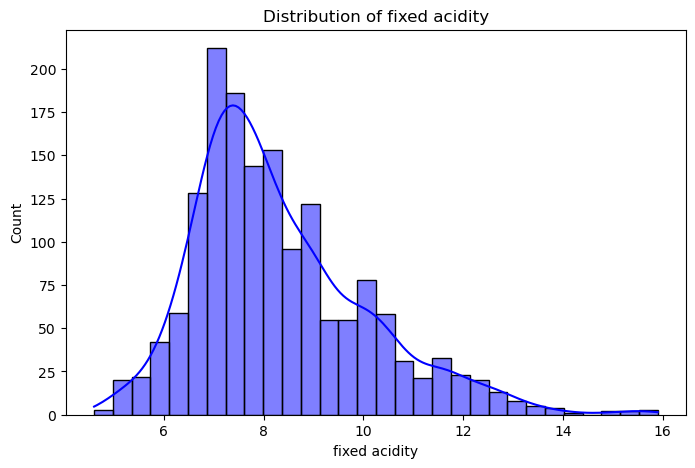

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


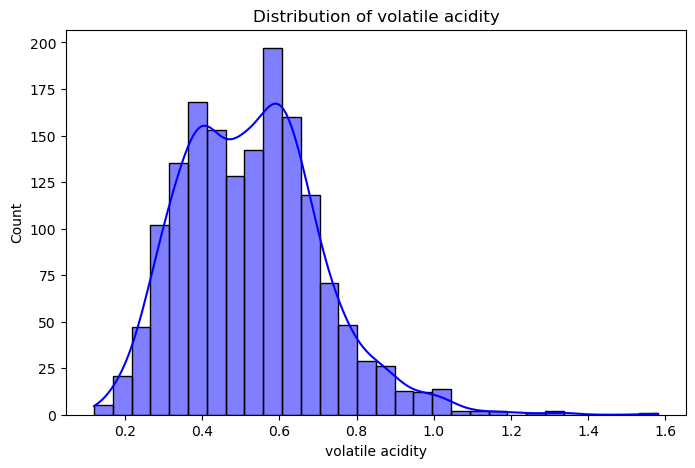

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


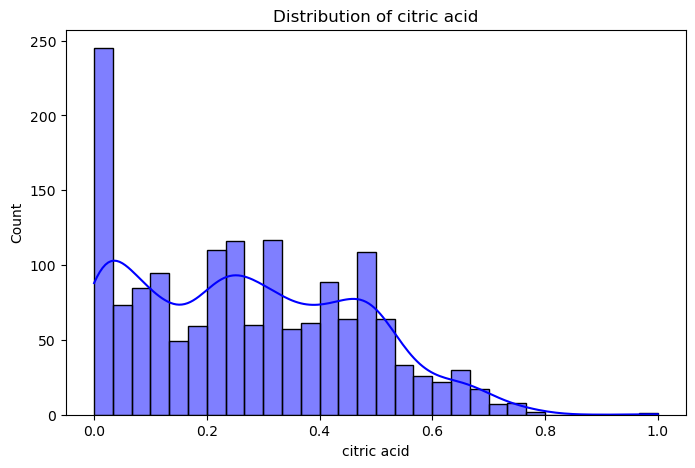

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


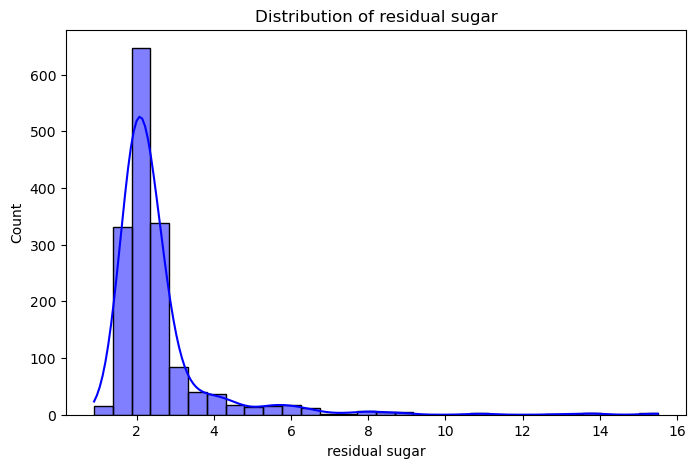

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


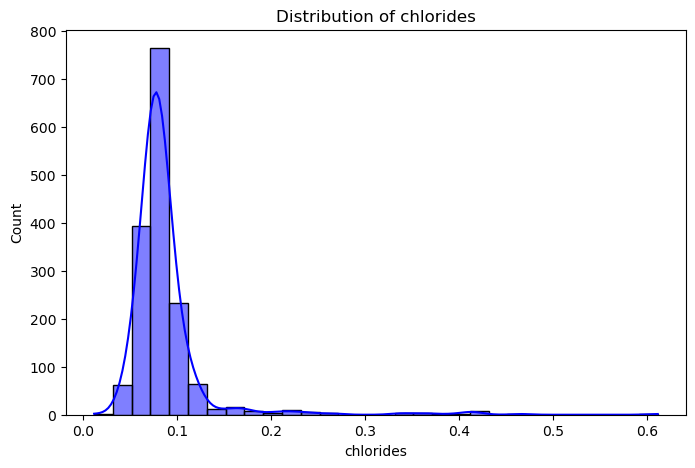

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


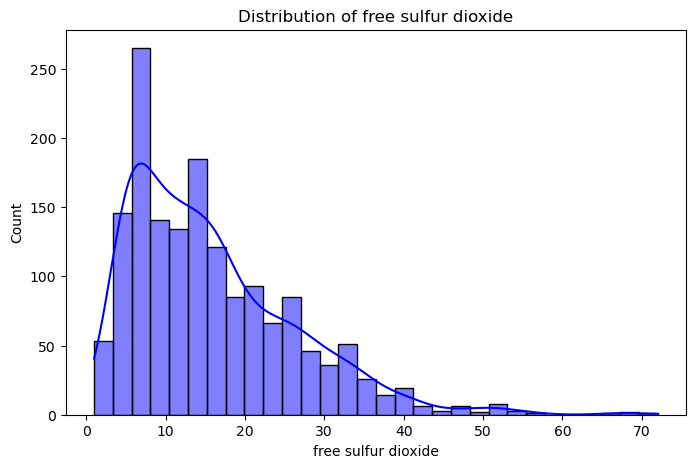

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


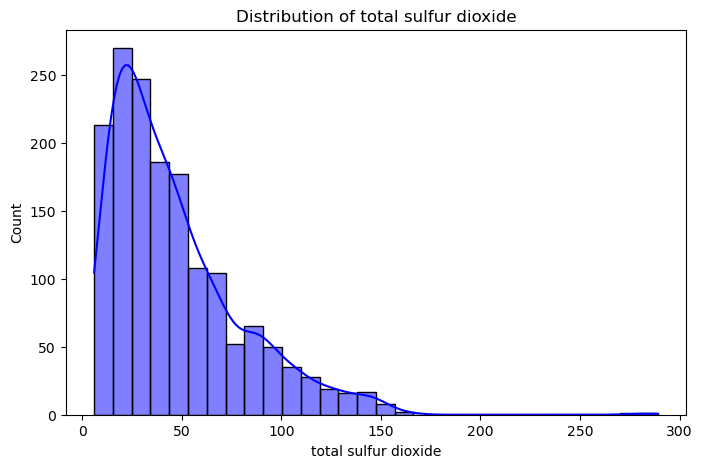

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


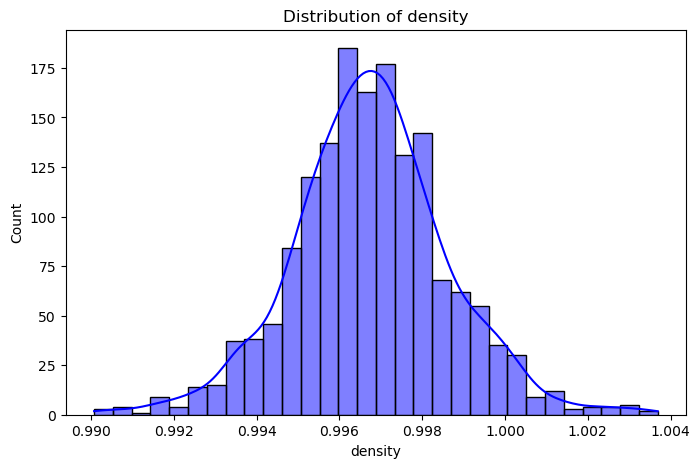

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


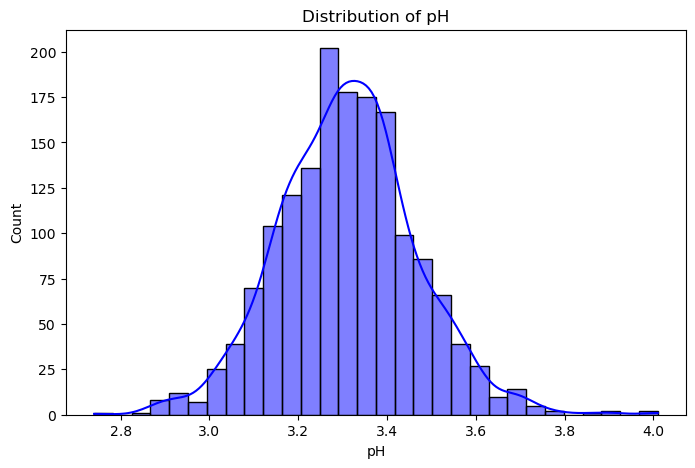

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


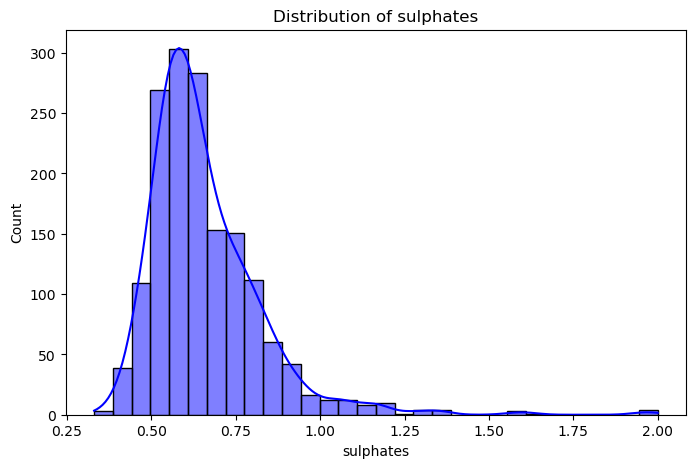

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


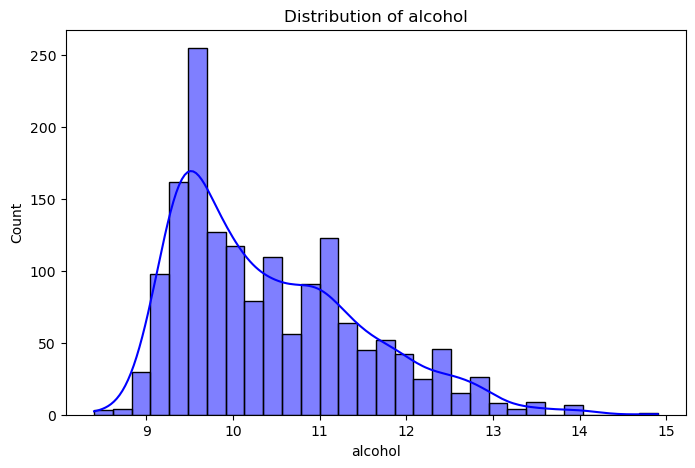

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


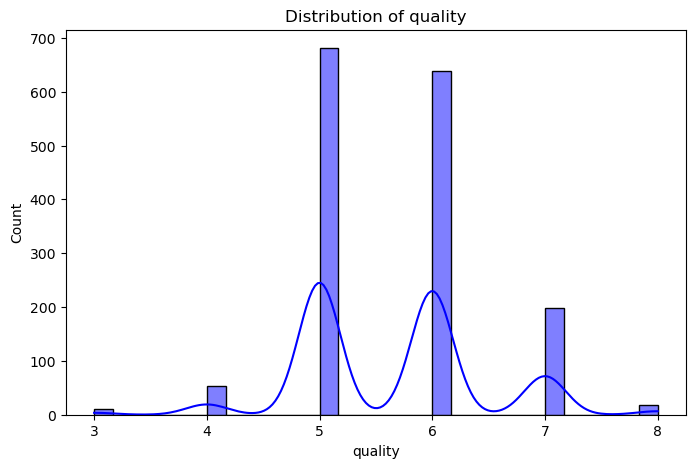

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

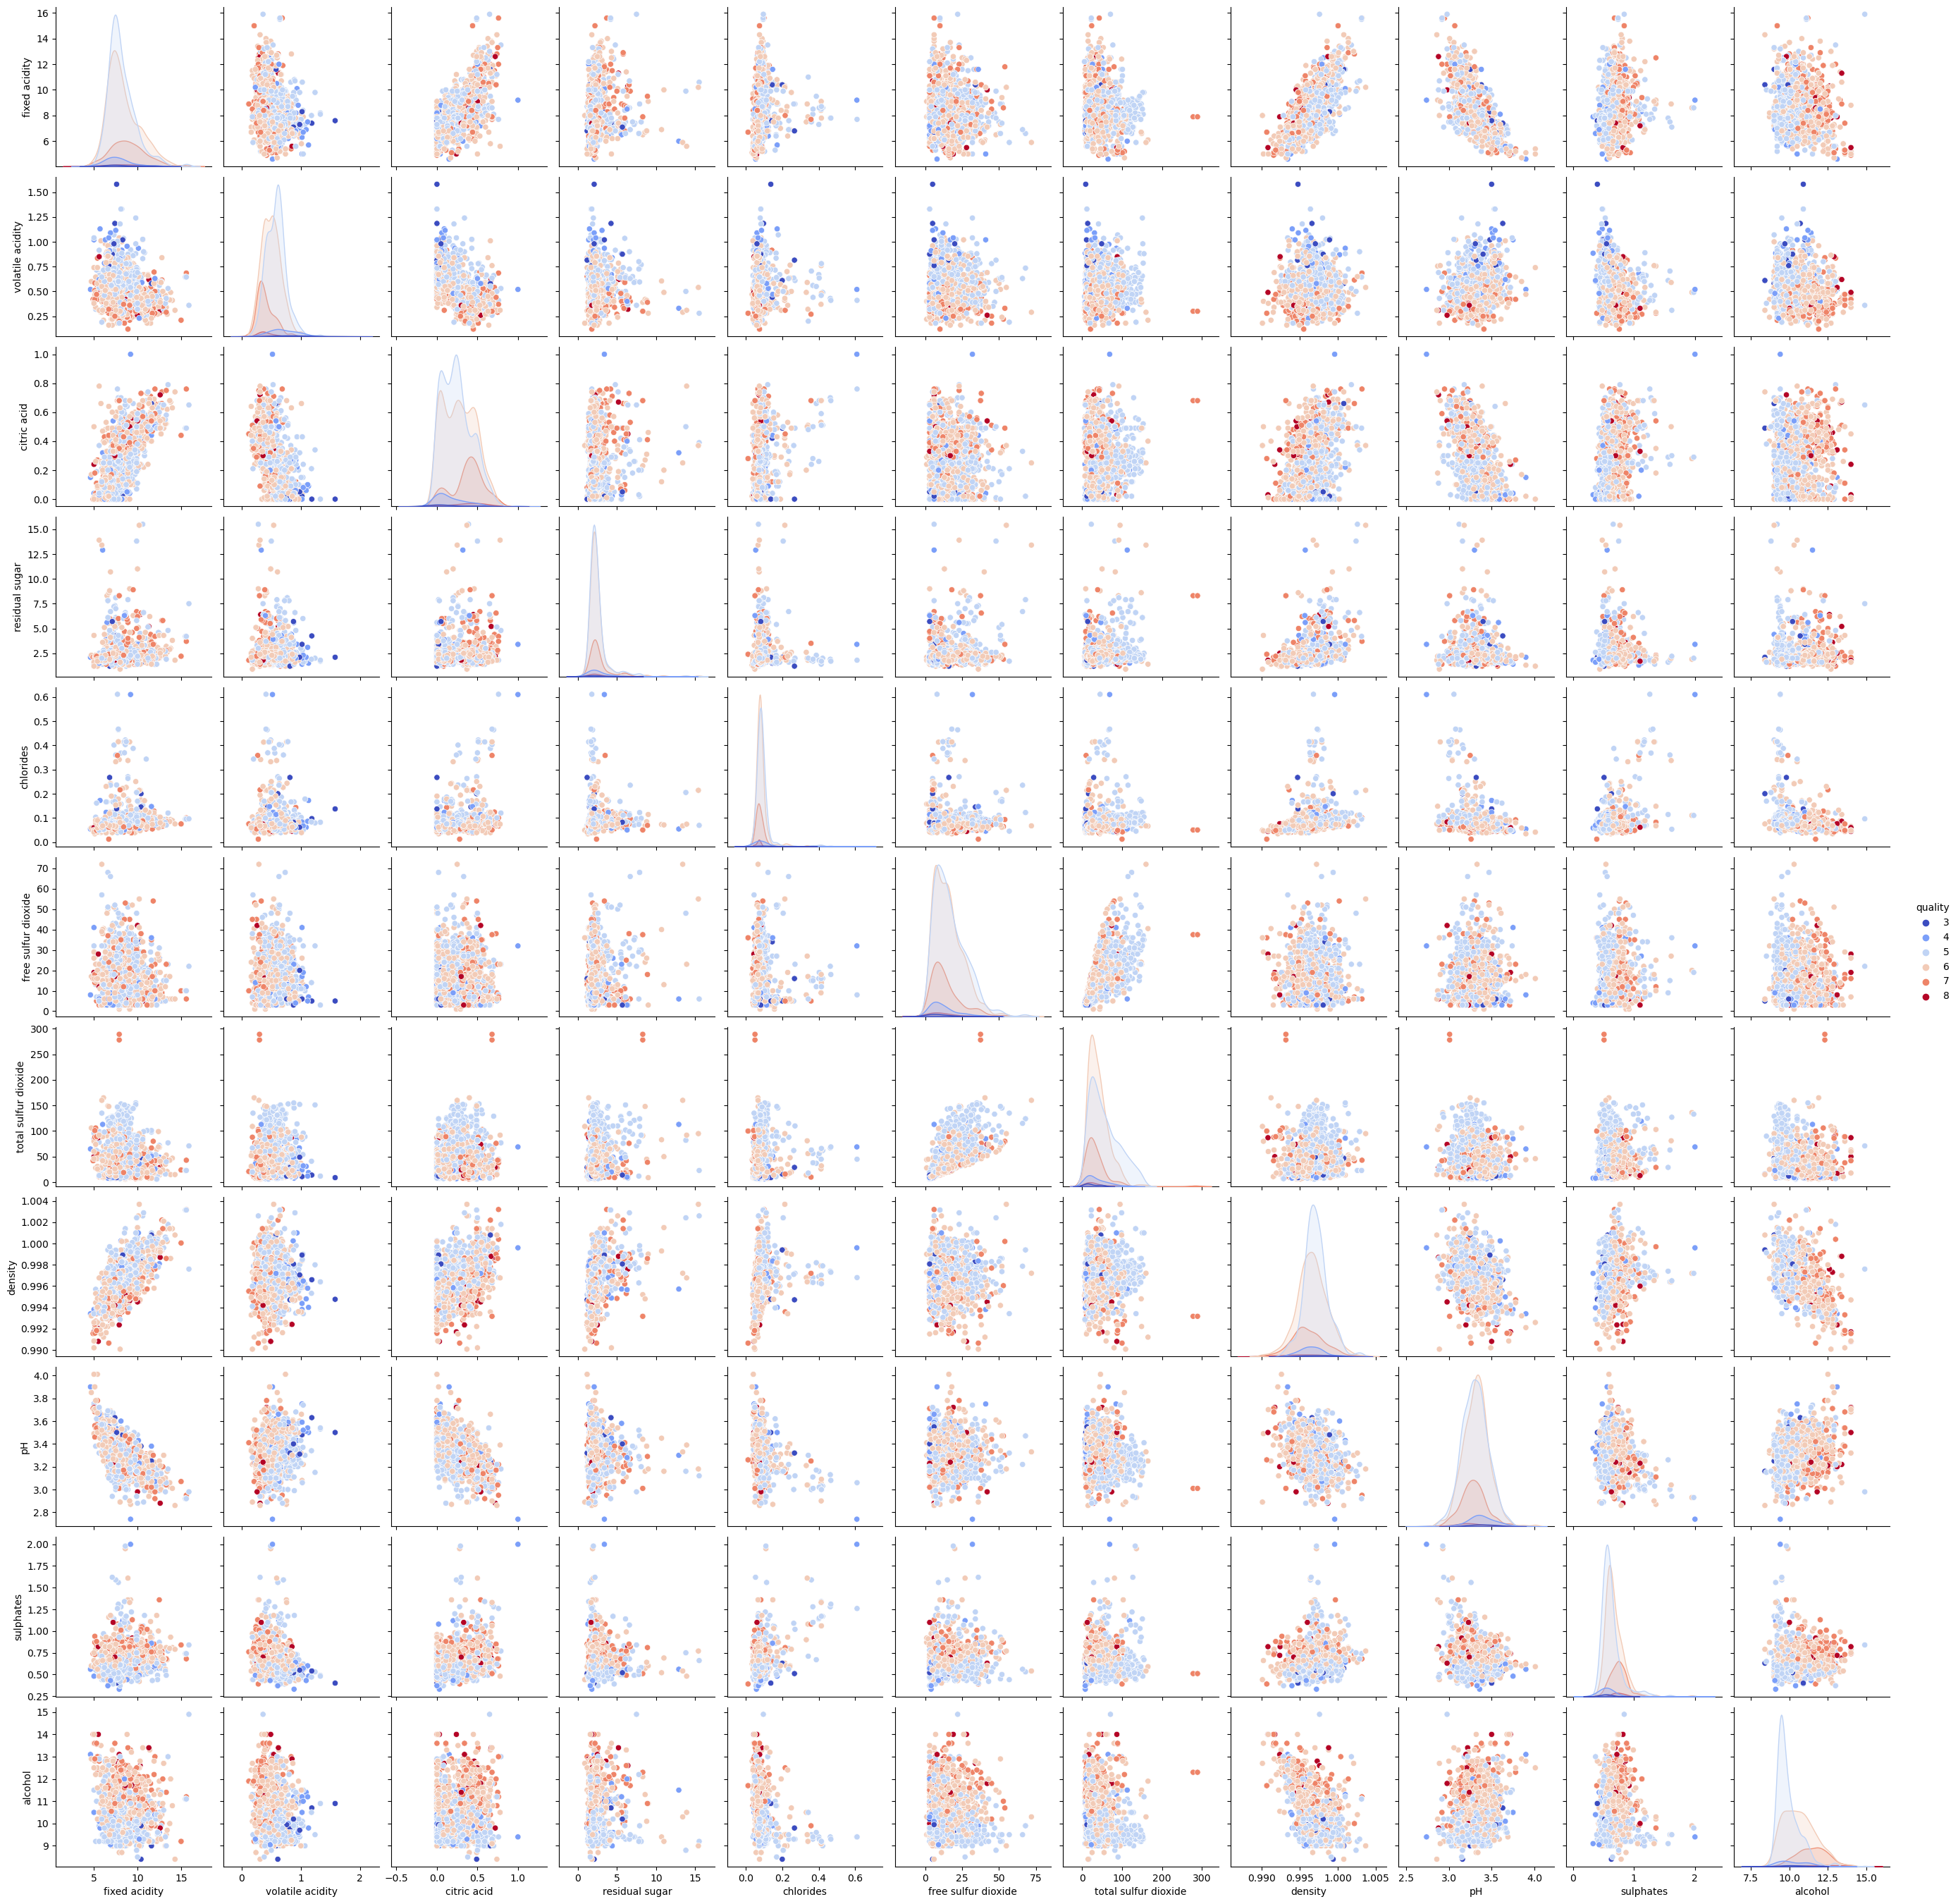

In [42]:
# Display summary statistics
print(df_wine.describe())

# Visualize the distribution of each feature
for feature in df_wine.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df_wine[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.show()

# Explore relationships using pairplots
sns.pairplot(df_wine, hue="quality", palette="coolwarm")
plt.show()



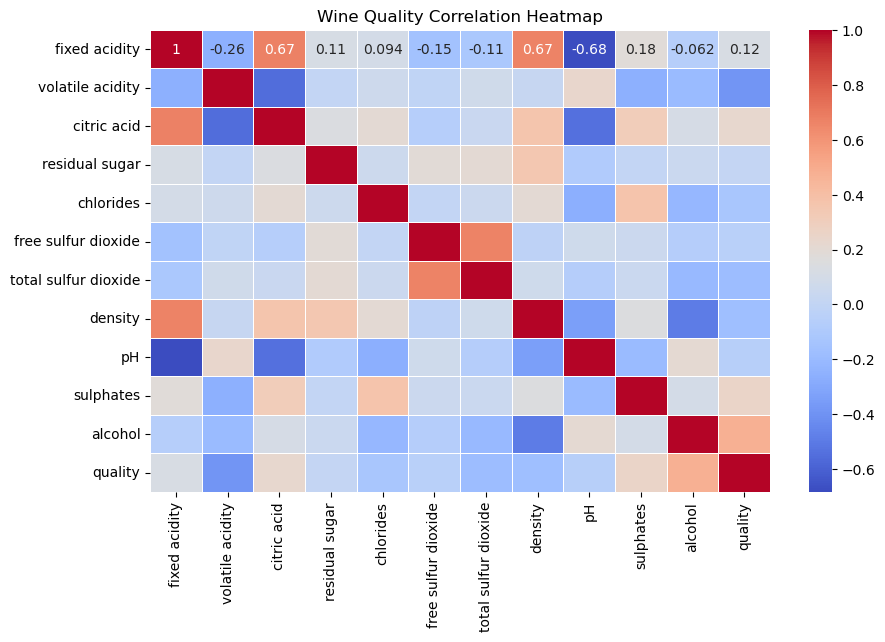

In [44]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_wine.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Wine Quality Correlation Heatmap")
plt.show()


In [46]:
# Example of scaling features (optional, depending on your analysis)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_wine_scaled = pd.DataFrame(scaler.fit_transform(df_wine), columns=df_wine.columns)

# Check the scaled data
print(df_wine_scaled.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   
1      -0.298547          1.967442    -1.391472        0.043416   0.223875   
2      -0.298547          1.297065    -1.186070       -0.169427   0.096353   
3       1.654856         -1.384443     1.484154       -0.453218  -0.264960   
4      -0.528360          0.961877    -1.391472       -0.453218  -0.243707   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.466193             -0.379133  0.558274  1.288643  -0.579207   
1             0.872638              0.624363  0.028261 -0.719933   0.128950   
2            -0.083669              0.229047  0.134264 -0.331177  -0.048089   
3             0.107592              0.411500  0.664277 -0.979104  -0.461180   
4            -0.466193             -0.379133  0.558274  1.288643  -0.579207   

    alcohol   quality  
0 -0.960246 -0.787823  
1 -0.584

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Check the column names to ensure 'quality' exists
print(df_wine.columns)

# Remove any leading/trailing spaces from column names
df_wine.columns = df_wine.columns.str.strip()

# Verify that 'quality' is a column
if 'quality' in df_wine.columns:
    # Split data into features (X) and target (y)
    X = df_wine.drop('quality', axis=1)
    y = df_wine['quality']

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Initialize and train the model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
else:
    print("'quality' column not found in the dataset. Please check the column names.")


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.72      0.75      0.73       195
           6       0.62      0.69      0.65       200
           7       0.56      0.46      0.50        61
           8       0.50      0.17      0.25         6

    accuracy                           0.65       480
   macro avg       0.40      0.34      0.36       480
weighted avg       0.63      0.65      0.64       480

[[  0   0   1   0   0   0]
 [  0   0  11   6   0   0]
 [  0   0 147  46   2   0]
 [  0   0  46 138  16   0]
 [  0   0   0  32  28   1]
 [  0   0   0   1   4   1]]


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

## Results and Data Analysis

**Wine Quality Dataset Findings**

Correlation Analysis: Alcohol content had the highest positive correlation with quality.

Visual Insights: High-quality wines had lower volatile acidity.


## Conclusion
In conclusion, the exploratory data analysis (EDA) of the Wine Quality dataset reveals key insights into the factors influencing wine quality ratings. Higher alcohol content is strongly correlated with better wine quality, highlighting its importance in the fermentation process. Conversely, volatile acidity negatively impacts quality, suggesting that excessive levels of acetic acid can detract from the taste. The presence of citric acid at moderate levels contributes positively to wine quality, while sulphates are found to have a beneficial effect due to their preservative properties. Additionally, combining related features, such as fixed acidity and citric acid into an acidity index, enhances the ability to predict wine quality more accurately. The analysis also uncovers outliers in features like residual sugar, which may need special attention to avoid skewing results. Finally, proper handling of missing data through imputation or deletion is crucial to ensure a complete and unbiased dataset. These insights, derived from summary statistics, correlation analysis, and feature engineering, lay a solid foundation for further predictive modeling and decision-making in wine quality assessment.


## References

Tukey, John W. "Exploratory Data Analysis." Addison-Wesley, 1977.
https://onlinelibrary.wiley.com/doi/10.1002/bimj.4710230408

McKinney, Wes. "Python for Data Analysis." O'Reilly Media, 2017.
https://www.oreilly.com/library/view/python-for-data/9781491957653/

Fisher, R.A. "The Use of Multiple Measurements in Taxonomic Problems." Annals of Eugenics, 1936.
https://onlinelibrary.wiley.com/doi/10.1111/j.1469-1809.1936.tb02137.x
